# Calibration mode

<img style="float: right;" src="../images/pyxel_logo.png" width="250">

In this notebook we will try out the calibration mode. The basic idea of calibration mode is to find a set of optimal model parameters, that will when applied to the **input** data set, give a result that is as close as possible to the **target** data set. To make fitting as efficient as possible, we make use of evolutionary algorithms, implemented in library `PyGMO`. Because of a heavy computation load, we also use `Dask` for parallelization, using multiple processor threads.

Calibration of a model in PyGMO nomenclature goes as follows: each processor thread is called an `island`. On each island lives a population of `individuals` (solution candidates), each randomly assigned with different `chromosomes` (model parameters). The individual with the best `fitness` (best solution) is called the `champion`. A group of islands is called an archipelago. During the evolution population is evolved multiple times with a chosen `algorithm`, each `evolution` consisting of multiple `generations`. The evolution is based on the principle of chromosome mutations. Populations can also `migrate` between the islands, taking with them the information about the best individuals. The result is that the individuals in the population get fitter and fitter. Finally, the best champion from each of the islands is extracted which gives the best model parameters.

We use library `Xarray` to store the results as a data set.

By the end of the lesson you will know how to:
* Prepare the configuration file for calibration mode
* Run calibration mode
* Inspect and save the calibration results

Read more:
[PyGMO](https://esa.github.io/pygmo2/) | [Dask](https://docs.dask.org/en/latest) | [Xarray](http://xarray.pydata.org/en/stable/)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
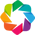

In [1]:
import pyxel

## Set a scheduler for ``Dask``

From `dask.distributed` documentation: the Client is the primary entry point for users of `dask.distributed`. The Client registers itself as the default Dask scheduler, and so runs all dask collections like `dask.array`, `dask.bag`, `dask.dataframe` and `dask.delayed`. `Dask.distributed` is a lightweight library for distributed computing in Python. It extends both the concurrent.futures and dask APIs to moderate sized clusters. It is a centrally managed, distributed, dynamic task scheduler. The central dask-scheduler process coordinates the actions of several dask-worker processes spread across multiple machines. See more on Dask distributed at https://distributed.dask.org/en/latest/.

By starting the Client we get a link to the Dask dashboard when we can track the progress of the calibration.

In [2]:
# Create a 'local' Cluster
from distributed import Client

client = Client()

client

<Client: 'tcp://127.0.0.1:53775' processes=4 threads=12, memory=31.72 GiB>

## Create running mode, detector and pipeline objects

In [3]:
config = pyxel.load("calibration.yaml")

calibration = config.calibration  # class Calibration
detector = config.detector  # class CCD
pipeline = config.pipeline  # class DetectionPipeline

## Plot the inputs

We can plot the input and target data with function `display_calibration_inputs` from `pyxel.notebook`

In [4]:
pyxel.display_calibration_inputs(calibration, detector)

:Layout
   .DynamicMap.Input  :DynamicMap   [id]
      :Curve   [x]   (y)
   .DynamicMap.Target :DynamicMap   [id]
      :Curve   [x]   (y)
   .Table.Filenames   :Table   [Input,Target]

## Run calibration

When we run the calibration mode, the islands are constructed and populated first. After the evolution starts and we can track the progress of calibration in dask dashboard. Output of the `calibration_mode` function is a named tuple of datasets.

In [5]:
%%time

result = pyxel.calibration_mode(
    calibration=calibration, detector=detector, pipeline=pipeline
)

Create islands:   0%|          | 0/10 [00:00<?, ?it/s]

Evolve with 10 islands:   0%|          | 0/20 [00:00<?, ? generations/s]

Saved calibration outputs to C:\Work\dev\pyxel-data\tutorial\calibration_output\run_20220127_111828
Wall time: 56.2 s


## The results

The result of the calibration mode is a named tuple containing `dataset`, `logs`, `filenames` and `processors`. `Dataset` contains the simulated detector arrays computed for the best set of parameters - best champion from each of the islands and each of the input data sets (noted by parameter_id). It also contains the target data, which can be used for comparison. Beside this it also holds information about the champion fitness, their decision vectors and parameters for each evolution and island. Because champion fitness in the result is not saved for each generation, we can also use `logs` to inspect how the fitness evolved over time. In `filenames` we save the information about the output filenames for saved data to disk and `processors` give us the ability to retrieve and compute the simulated data.

In [6]:
result.dataset

<xarray.Dataset>
Dimensions:              (island: 10, evolution: 2, param_id: 9, id_processor: 6, readout_time: 1, y: 335, x: 1)
Coordinates:
  * island               (island) int64 0 1 2 3 4 5 6 7 8 9
  * evolution            (evolution) int64 0 1
  * id_processor         (id_processor) int32 0 1 2 3 4 5
  * readout_time         (readout_time) int32 1
  * y                    (y) int32 500 501 502 503 504 ... 830 831 832 833 834
  * x                    (x) int32 0
  * param_id             (param_id) int32 0 1 2 3 4 5 6 7 8
Data variables:
    champion_fitness     (evolution, island) float64 2.007e+04 ... 1.844e+04
    champion_decision    (evolution, island, param_id) float64 0.3348 ... 11.7
    champion_parameters  (evolution, island, param_id) float64 0.3348 ... 11.7
    simulated_image      (island, id_processor, readout_time, y, x) uint32 77...
    simulated_signal     (island, id_processor, readout_time, y, x) float64 0...
    simulated_pixel      (island, id_processor, readout_time, y, x) float64 1...
    target               (id_processor, y, x) float64 1.481e+03 ... 173.8
Attributes:
    num_islands:      10
    population_size:  20
    num_evolutions:   2
    generations:      10
    topology:         unconnected
    result_type:      ResultType.Pixel

In [7]:
result.logs

num_generations  num_evaluations  best_fitness         f        cr  \
0                  1               20  23833.407994  0.258077  0.484660   
1                  1               20  25491.810867  0.341738  0.020078   
2                  1               20  19383.681581  0.878877  0.240049   
3                  2               40  25491.810867  0.341738  0.020078   
4                  2               40  23833.407994  0.258077  0.484660   
..               ...              ...           ...       ...       ...   
349                6              120  21008.048055  0.312388  0.906761   
350                7              140  21008.048055  0.312388  0.906761   
351                8              160  18468.586349  0.765647  0.116548   
352                9              180  18468.586349  0.765647  0.116548   
353               10              200  18443.465647  0.765647  0.116548   

            dx             df  id_island  id_evolution  global_num_generations  
0    13.719997  101323.768669          1             1                       1  
1     8.924721   50207.873140          1             1                       1  
2    12.146441   43505.448965          1             1                       1  
3    14.411231   37482.302197          1             1                       2  
4    13.339457   98777.076682          1             1                       2  
..         ...            ...        ...           ...                     ...  
349  12.643014   38287.918735         10             2                      16  
350  11.582230   37360.018779         10             2                      17  
351  11.752882   20098.223960         10             2                      18  
352  11.752882   20098.223960         10             2                      19  
353   8.957569   20121.808044         10             2                      20  

[354 rows x 10 columns]